# Abundance isotopic plots - 3D and N by Z

This notebook allows a ppn data set to be plotted out in two formats

The first format is that of a 3D plot, showing the abundance on the z-axis.
The second format is a 2D plot of an isotopic chart with abundances plotted on top.

Currently only tested with abundances as mass fraction from iso_massfXXXXX.DAT generated by a ppn simulation.

In [1]:
# Ensure that your nugridpy directory has a PYTHONPATH to it
from nugridpy import ppn as p

#### Import cell

Data importing from ppn folder

In [5]:
#From within the current folder
a = p.abu_vector('../NuPPN/frames/ppn/traj1/')

#Cycle to get data from
cycle = 40

#Define z and n ranges
zmin   = 16
zmax   = 24
nmin   = 18
nmax   = 26
lbound = 1.0e-10

ain=a.get('A',cycle)
zin=a.get('Z',cycle)
nin=ain-zin
yin=a.get('ABUNDANCE_MF',cycle)

# add stable isotopes
zz=[]
nn=[]
for i in xrange(len(a.stable_el)):
    if i == 0:
        continue
    tmp = a.stable_el[i]
    try:
        zz_dum = a.elements_names.index(tmp[0])
    except (IndexError, ValueError):
        continue
    for j in xrange(len(tmp)):
        if j == 0:
            continue
        zz.append(zz_dum) #charge    
        nn_dum = int(tmp[j]) #atomic mass
        nn.append(nn_dum-zz_dum)

226 cycle numbers found in ../NuPPN/frames/ppn/traj1/
Ranging from 00000 to 00225
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files


#### 3D abundance plot

Includes an option for the positions of the displayed max abundances per z value. These options are to be printed as a notebook output and as part of the graph.

The 3d plot shows values of under the lbound value in cell 2 as coloured squares.

Also includes options for graph colours.

X is given as the log$_{10}$ of the abundance

Max abundances for each z value:
Z= 16.0, N= 18.0, X= 7.168E-06
Z= 17.0, N= 18.0, X= 8.636E-07
Z= 18.0, N= 20.0, X= 5.698E-06
Z= 19.0, N= 20.0, X= 6.865E-07
Z= 20.0, N= 24.0, X= 1.289E-06
Z= 21.0, N= 26.0, X= 1.715E-06
Z= 22.0, N= 26.0, X= 1.105E-04
Z= 23.0, N= 26.0, X= 1.033E-04
Z= 24.0, N= 26.0, X= 8.756E-05


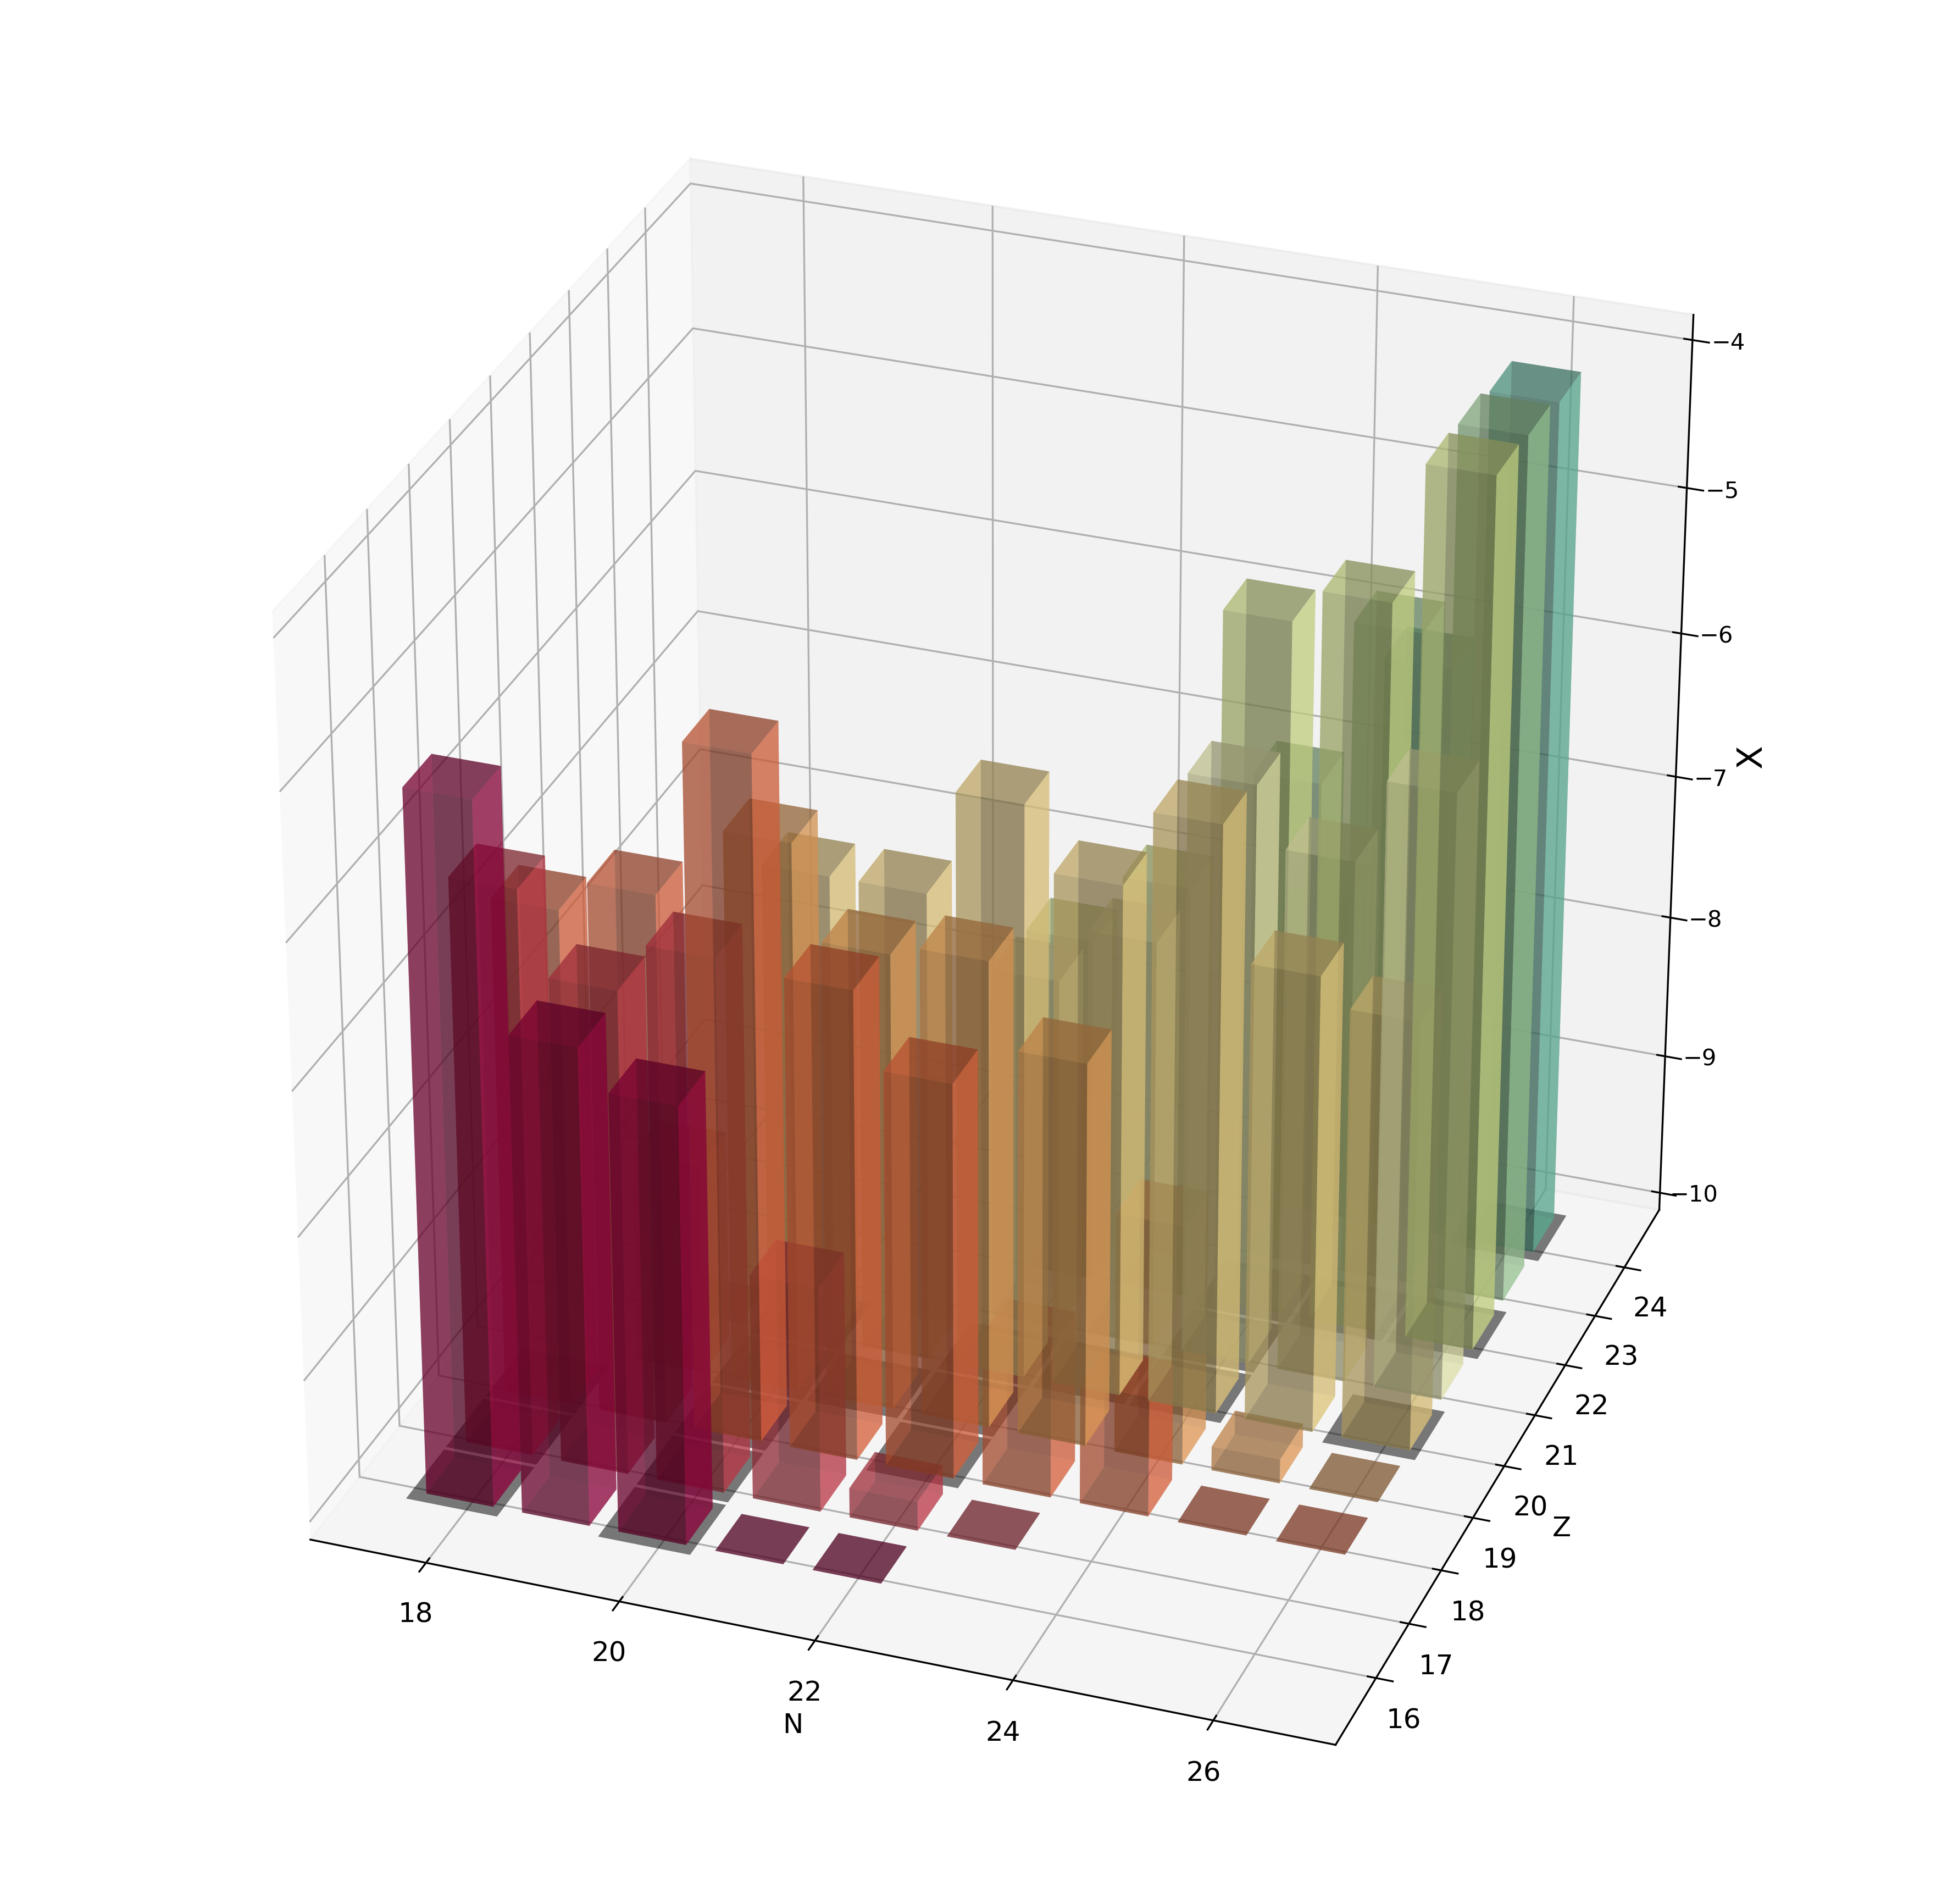

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
from matplotlib import cm
import numpy as np
import math
import itertools as it

#CHOOSE YOUR ABUNDANCE OUTPUT METHOD, IF INTERNAL = FALSE WILL PRINT EXTERNALLY
internal=False

#SET MATPLOTLIB STYLE - CONFIG HERE SHOULD INREASE RESOLUTION
%config InlineBackend.figure_format="retina"
%matplotlib inline

# PREPARING N, Z AND ABUNDANCES
x_data = nin
y_data = zin
x_data = x_data.flatten()
y_data = y_data.flatten()# giving X
z_data = yin.flatten()

# SELECTING BASED ON LIMITS AS DEFINED ABOVE
selector_1 = [ nmin<=x<=nmax for x in x_data]
x_dum = list(it.compress(x_data, selector_1))
y_dum = list(it.compress(y_data, selector_1))
z_dum = list(it.compress(z_data, selector_1))
selector_2 = [ zmin<=x<=zmax for x in y_dum]
x_plot = list(it.compress(np.array(x_dum), selector_2))
y_plot = list(it.compress(y_dum, selector_2))
z_plot = list(it.compress(z_dum, selector_2))

# define position for each Z of most abundant specie
max_per_z = []
for i in np.unique(y_plot):
    jj = 0
    max_zplot = 0.
    for j in y_plot:
        if i==j and z_plot[jj] > max_zplot:
            max_zplot = z_plot[jj] 
            loc_max=jj
        jj=jj+1    
    max_per_z.append([x_plot[loc_max],y_plot[loc_max],z_plot[loc_max]])        

# PLOT CONFIG
fig=plt.figure(figsize=(15., 15.), dpi=150)
ax = fig.gca(projection='3d')
xmin = min(x_plot)
xmax = max(x_plot)
ymin = min(y_plot)
ymax = max(y_plot)
z_min = lbound
z_max = max(z_plot)

# COLOURS TO USE: In this case, same color for isotopes of the same element, i.e., same Z
# color_data = ["#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",\
#               "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd",\
#               "#ccebc5","#ffed6f"]     
# color_data = ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00",\
#               "#ffff33","#a65628","#f781bf","#999999"]
# color_data = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854",\
#               "#ffd92f","#e5c494","#b3b3b3"]
color_data = ["#9e0142","#d53e4f","#f46d43","#fdae61","#fee08b",\
              "#ffffbf","#e6f598","#abdda4","#66c2a5","#3288bd","#5e4fa2"]
ind_color={}     
for a,b in zip(np.unique(y_plot),color_data):
    ind_color[a]=b   

# SELECTION PARAMETERS AND SELECTION
selector_1 = [ nmin<=x<=nmax for x in nn]
nn_dum = list(it.compress(nn, selector_1))
zz_dum = list(it.compress(zz, selector_1))
selector_2 = [ zmin<=x<=zmax for x in zz_dum]
nn_plot = list(it.compress(np.array(nn_dum), selector_2))
zz_plot = list(it.compress(zz_dum, selector_2))

# ADDING STABLE ISOTOPE BOXES
for i in range(0,len(nn_plot),1):
    ax.bar3d(nn_plot[i]-0.5,zz_plot[i]-0.5,math.log10(lbound),\
             0.95, 0.95, 0., color = 'k', alpha=0.3 )

    
# ALTERING THE ABUNDANCES DUE TO AXES3D LOG SCALE ISSUES
dum = []
z_plot_log = []
for i in z_plot:
    dum = math.log10(i)-(math.log10(lbound))
    z_plot_log.append(dum)    
        
#PLOTTING ABUNDANCES
factor_box = 0.7
for i in range(0,len(x_plot),1): 
    if z_plot_log[i] >= 0:
        ax.bar3d(x_plot[i]-(factor_box*.5),y_plot[i]-(factor_box*.5),math.log10(lbound),\
                 factor_box, factor_box,\
                 z_plot_log[i], color = ind_color[y_plot[i]],alpha=0.5)
    else:
        ax.bar3d(x_plot[i]-(factor_box*.5),y_plot[i]-(factor_box*.5),math.log10(lbound),\
                 factor_box, factor_box,\
                 0, color = ind_color[y_plot[i]],alpha=0.5)

#Adding highest abundances at each z value
toplist=[]
for i in range(len(max_per_z)):
    toplist.append(math.log10(max_per_z[i][2]))
label_placement=np.linspace(math.log10(lbound),np.max(toplist),num=len(toplist))

if internal:
    print ""
else:
    print "Max abundances for each z value:"

for i in range(len(np.unique(y_plot))):
    label = "Z= %s, N= %s, X= %s" %(max_per_z[i][1],max_per_z[i][0],\
                                    '%.3E' %(max_per_z[i][2]))    
    if internal:
        ax.text(nmax+4,zmax,label_placement[i],label, fontsize=14.)
    else:
        print label
    
# DEFINE ANGLE TO VIEW
ax.view_init(azim=-70.)

# LIMITS AND LABELS
ax.set_xlim3d(xmin-1,xmax+1)
ax.set_ylim3d(ymin-1,ymax+1)
ax.set_zlim3d(math.log10(z_min),math.log10(z_max))

ax.set_xlabel('N',fontsize=12.)
ax.set_ylabel('Z',fontsize=12.)
ax.set_zlabel('X', rotation=90,fontsize=15.)

# TICK CONFIG
xticks_coarse = 2
yticks_coarse = 1
zticks_coarse = 10
ticksx = np.arange(nmin, nmax+1, xticks_coarse)
plt.xticks(ticksx,fontsize=12.)
ticksy = np.arange(zmin, zmax+1, yticks_coarse)
plt.yticks(ticksy,fontsize=12.)
zticks = np.arange(math.log10(lbound),math.log10(z_max),1)
# ax.set_zticks(zticks)
plt.show()

#### 2D Abundance isotopic chart

Grid shown is neutron number by proton number. Abuyndances are shown per 'tile' in the isotopic chart.

Green tiles denote a stable isotope, grey tiles denote a value that the code found no data for.

In [ ]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# FIG CONFIG
fig = plt.figure(figsize=(15., 15.))
minorLocator = MultipleLocator(1)
plt.tick_params(labelsize=12)

# REDEFINING PARAMETERS
z_max = z_max
nvals = x_plot
pvals = y_plot
abund = z_plot
u_nvals = np.unique(nvals)
u_pvals = np.unique(pvals)
nrange = np.arange(nmin,nmax+1,1)
prange = np.arange(zmin,zmax+1,1)
abun_plot_data = []
low_val_fill = -1e-99

# CHECK FOR MISSING DATA VALUES BY
# COMPARING THE LENGTH OF N, P AND ABUNDANCES TO EXPECTED LENGTHS OF N 
checklist = np.arange(0,len(nrange))
for j in range(len(u_pvals)):
    for i in range(len(nrange)):
        count_n = nvals[checklist[i]]
        if nrange[i] != count_n:
            nvals.insert(checklist[i],nrange[i])
            pvals.insert(checklist[i],u_pvals[j])
            abund.insert(checklist[i],low_val_fill)
    checklist = checklist+len(nrange)        
        
# FORMAT FOR PLOTTING
for i in u_pvals:
    dum = []
    jj=0
    for j in pvals:
        if j==i:
            dum.append(abund[jj])
        jj=jj+1
    abun_plot_data.append(dum) 
    
# NUMBER OF PANELS
Npanels = len(u_pvals)

#PLOTTING THE DATA SETS
for i in range(0,Npanels):
    ii=Npanels-1-i
    format = Npanels*100 + 11  # makes label: 311 for 3 rows, 1 col, start at 1
    # CHECK THE SUBPLOT VALUES - ERROR WILL STOP THE LOOP
    try:
        ax = plt.subplot(format + i) 
    except ValueError:
        print "Z range too high, format out as [%s], must be 3 digits" %format
        break
    # PLOTTING SEMILOG SCALES - INCLUDES ERROR FOR IF NULL DATA VALUES MISSING
    try:
        plt.semilogy(nrange, abun_plot_data[ii],'k-o',markersize=5.,\
            label="Z = "+str(int(u_pvals[ii])))
    except ValueError:
        print "Blank at Z = %s, due to misaligned t and all_each_z"\
            %(str(int(u_pvals[ii])))
    # NO DATA GRAY BOXES
    for k in range(len(nrange)):
        if abun_plot_data[ii][k]<0:
            ax.axvspan(nrange[k]-0.5, nrange[k]+0.5, alpha=0.4, color='black', lw=0.)
    ax.set_xlabel('N',fontsize=15.)
    ax.legend(numpoints=1,loc="upper left", framealpha=0.)
#     ax.grid(alpha=0.6, color='k')
    ax.set_ylabel('Abundance',fontsize=12.)
    ax.set_ylim(z_min-(0.1*z_min),z_max*2.)
    ax.set_xlim(xmin-0.5,xmax+0.5)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.xaxis.set_tick_params(width=3)
    plt.subplots_adjust(hspace = .001)
    # STABLE ISOTOPE GREEN BOXES
    if ii!=0:
        plt.setp(ax.get_xticklabels(), visible=False)
    for j in range(len(zz)):# condition on nn is for the 999 in utils.py
            if int(u_pvals[ii]) == int(zz[j]) and int(nn[j])<500: 
                ax.axvspan(nn[j]-0.5, nn[j]+0.5, alpha=0.5, color='green', linewidth=0.)
                if nn[j]>xmin and nn[j]<=xmax:
                    ax.text(nn[j]+0.05,z_max*0.5,"A="+str(int(nn[j]+zz[j])),fontsize=10)